Data Importing and Cleaning

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import plotly.express as px
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv("nearest-earth-objects(1910-2024).csv")

In [6]:
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.40105,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.75710,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.50680,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.07681,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.51948,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.98599,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.76895,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.04103,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.38273,5.184742e+06,False


In [8]:
df.head(10)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.40105,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.75710,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.50680,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.07681,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.51948,6.311863e+07,False
5,3656926,(2014 BT8),25.00,0.026580,0.059435,Earth,47477.64983,4.290521e+07,False
6,3421513,(2008 OX1),21.50,0.133216,0.297879,Earth,57853.29535,2.727908e+07,True
7,3541504,(2010 OF101),19.75,0.298233,0.666868,Earth,46972.48679,6.997593e+07,False
8,3836942,(2018 YH),21.70,0.121494,0.271669,Earth,37424.54838,5.657727e+06,True
9,3892166,(2019 UP13),23.45,0.054269,0.121350,Earth,38524.86787,6.166118e+07,False


In [10]:
df.tail(10)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
338189,3794988,(2017 YZ1),20.430,0.218049,0.487573,Earth,54747.60025,1.067043e+07,True
338190,54016728,(2020 HH5),19.210,0.382433,0.855145,Earth,86536.00365,6.861679e+07,False
338191,2585310,585310 (2017 YZ1),20.430,0.218049,0.487573,Earth,54747.57783,1.067038e+07,True
338192,54269585,(2022 GQ2),25.820,0.018220,0.040742,Earth,24350.54746,5.525946e+07,False
338193,54336231,(2022 YJ2),22.140,0.099210,0.221840,Earth,41743.29005,3.770475e+07,False
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.98599,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.76895,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.04103,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.38273,5.184742e+06,False
338198,54460573,(2024 NH3),22.951,0.068290,0.152700,Earth,42060.35783,7.126682e+06,False


In [12]:
df.duplicated().sum()

0

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [16]:
#handle missing values
df.dropna(inplace=True)
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.40105,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.75710,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.50680,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.07681,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.51948,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.98599,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.76895,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.04103,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.38273,5.184742e+06,False


In [18]:
df.info

<bound method DataFrame.info of           neo_id                name  absolute_magnitude  \
0        2162117  162117 (1998 SD15)              19.140   
1        2349507    349507 (2008 QY)              18.500   
2        2455415    455415 (2003 GA)              21.450   
3        3132126           (2002 PB)              20.630   
4        3557844           (2011 DW)              22.700   
...          ...                 ...                 ...   
338194  54403809          (2023 VS4)              28.580   
338195  54415298          (2023 XW5)              28.690   
338196  54454871          (2024 KJ7)              21.919   
338197  54456245           (2024 NE)              23.887   
338198  54460573          (2024 NH3)              22.951   

        estimated_diameter_min  estimated_diameter_max orbiting_body  \
0                     0.394962                0.883161         Earth   
1                     0.530341                1.185878         Earth   
2                     0.136319 

Exploratory Data Analysis (EDA)

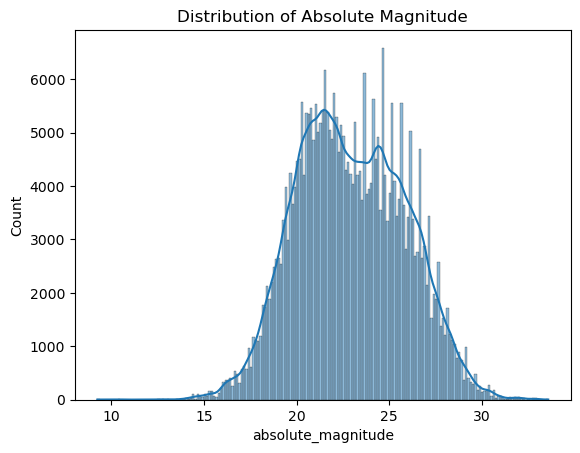

In [21]:
sns.histplot(df['absolute_magnitude'], kde=True)
plt.title('Distribution of Absolute Magnitude')
plt.show()

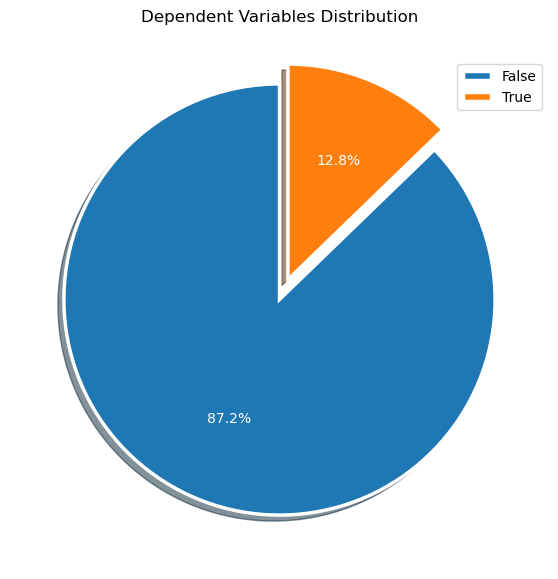

In [22]:
explode = (0, 0.1)
fig = plt.figure(figsize = (7, 7), facecolor='w')
out_df=pd.DataFrame(df.groupby('is_hazardous')['is_hazardous'].count())

patches, texts, autotexts = plt.pie(out_df['is_hazardous'], autopct='%1.1f%%',
                                    textprops={'color': "w"},
                                    explode=explode,
                                    startangle=90, shadow=True)

for patch in patches:
    patch.set_path_effects({path_effects.Stroke(linewidth=2.5,
                                                foreground='w')})

plt.legend(labels=['False','True'], bbox_to_anchor=(1., .95))
plt.title('Dependent Variables Distribution')
# plt.savefig('gender_pie')
plt.show()

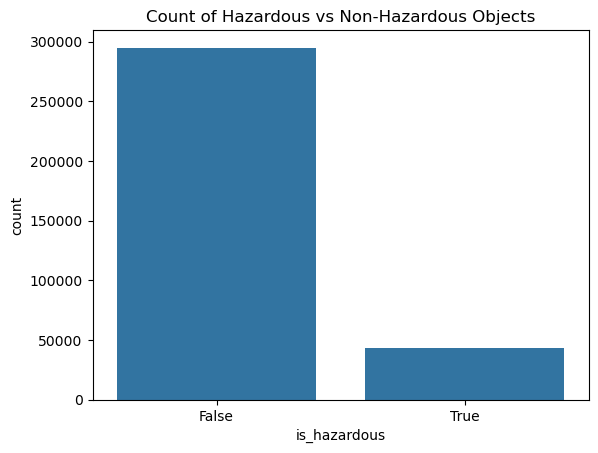

In [25]:
# Hazardous vs Non-Hazardous distribution (another one)
sns.countplot(x='is_hazardous', data=df)
plt.title('Count of Hazardous vs Non-Hazardous Objects')
plt.show()

In [ ]:
# Scatter plot of 'relative_velocity' vs 'miss_distance'
fig = px.scatter(df, x='relative_velocity', y='miss_distance', color='is_hazardous', 
                 title="Relative Velocity vs Miss Distance (Hazardous vs Non-Hazardous)")
fig.show()

In [ ]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['name', 'orbiting_body'])
# Calculate correlation matrix
plt.figure(figsize=(15, 6))
plt.title('Correlation Heatmap')
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Encoding
le = LabelEncoder()
df['orbiting_body'] = le.fit_transform(df['orbiting_body'])
X = df.drop(columns=['neo_id', 'name', 'is_hazardous'])  # Drop irrelevant columns
y = df['is_hazardous']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


Model Training and Evaluation

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_res, y_train_res)
# Predictions
y_pred = model.predict(X_test)
# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# AUC-ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend()
plt.show()
